In [190]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import pandas as pd
import math
# Step 1: Generate list of integers
np.random.seed(123345)
data_length = 100000
read_depth_array = np.random.randint(60, 101, size=data_length)
#print(read_depth_array)

In [191]:
# step 2: Make integers even if they aren't already
def odd_to_even(x):
    val = x if (x % 2 == 0) else x-1
    return val
#odd_even_func = np.vectorize(odd_to_even)
#even_array = odd_even_func(read_depth_array)
#print(even_array)

In [192]:
# step 3: create a new numpy array with three columns
read_coverage_per_chrom = np.zeros((data_length, 3))
for i in range(data_length):
    if (read_depth_array[i] % 2 == 0):
        split_val = read_depth_array[i] / 2
        if (i % 2 == 0):
            read_coverage_per_chrom[i][0] = split_val - 1
            read_coverage_per_chrom[i][1] = split_val + 1
            read_coverage_per_chrom[i][2] = read_depth_array[i]
        else:
            read_coverage_per_chrom[i][0] = split_val
            read_coverage_per_chrom[i][1] = split_val
            read_coverage_per_chrom[i][2] = read_depth_array[i]
    else:
        split_val = math.floor(read_depth_array[i]/2)
        read_coverage_per_chrom[i][0] = split_val
        read_coverage_per_chrom[i][1] = split_val + 1
        read_coverage_per_chrom[i][2] = read_depth_array[i]
#print(read_coverage_per_chrom)

In [193]:
# step 4: generate gaussian noise, round to nearest integer and then take absolute value
std_dev = 3
random_noise = np.random.normal(0, std_dev, data_length)
rounded_noise = np.rint(random_noise)
abs_val_noise = np.absolute(rounded_noise)
clipped_noise = np.clip(abs_val_noise, 0,3 * std_dev)
#print(clipped_noise)

In [194]:
# step 5: inject noise into read_coverage_per_chrom
for i in range(data_length):
    read_coverage_per_chrom[i][0] = read_coverage_per_chrom[i][0] - clipped_noise[i]
    read_coverage_per_chrom[i][1] = read_coverage_per_chrom[i][1] + clipped_noise[i]
#print(read_coverage_per_chrom)

In [195]:
# step 6: calculate BAF ratios
BAF = np.zeros(2*data_length)
for i in range(data_length):
    BAF[2*i] = read_coverage_per_chrom[i][0]/read_coverage_per_chrom[i][2]
    BAF[2*i + 1] = read_coverage_per_chrom[i][1]/read_coverage_per_chrom[i][2]
# print(BAF)

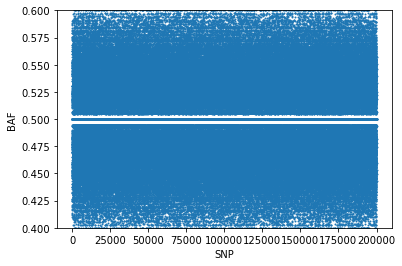

In [196]:
plt.scatter(range(2*data_length), BAF, s=1)
plt.ylim(0.4, 0.6)
plt.xlabel('SNP')
plt.ylabel('BAF')
plt.show()